In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, font_manager

In [2]:
#default plotting parameters
pad = 5
xpad = 15
ypad = 11

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '-'
plt.rcParams['figure.figsize'] = 8.5,11

plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '16'

color = 'black'
alpha = 0.2
markersize = 60
capsize = 8
elinewidth = 4
lw = 4
barwidth = 0.5

In [3]:
#for use with replicates
def myplot(DF,ax=None, color=None, **kwargs):
    m = DF.mean(1).to_numpy()
    s = DF.std(1).to_numpy()
    t = DF.index.values
    if ax:
        ax.plot(t,m, color= color, **kwargs)
        ax.fill_between(t, m-s, m+s, alpha = 0.1, color = color)
    else:
        plt.plot(t,m, color= color, **kwargs)
        plt.fill_between(t, m-s, m+s, alpha = 0.1, color = color)
        
#for use with mean, std
def myplot_new(DF_mean, DF_std, ax=None, color=None, **kwargs):

    t = DF_mean.index.values
    if ax:
        ax.plot(t,DF_mean, color= color, **kwargs)
        #ax.fill_between(t, DF_mean-DF_std, DF_mean+DF_std, alpha = 0.1, color = color)
    else:
        plt.plot(t,DF_mean, color= color, **kwargs)
        #plt.fill_between(t, DF_mean-DF_std, DF_mean+DF_std, alpha = 0.1, color = color)

In [4]:
palette_1 = ['#00429d', '#4771b2', '#73a2c6', '#a5d5d8', '#ffffe0', '#ffbcaf', '#f4777f', '#cf3759', '#93003a']
palette_2 = ['#004ace', '#6755b9', '#8e63a8', '#ab729b', '#c38195', '#da9098', '#ef9fa9', '#ffaed8']
palette_venasaur = ['#105241', '#ff7b73', '#5a9c39', '#5ad5c5', '#de4141', '#ffbdbd']

In [5]:
import os
os.getcwd()

'C:\\Users\\Diego Alba\\OneDrive - UW\\research\\carothers\\cell data\\activatable promoters\\bl\\txtl'

## Read in data

In [6]:
data = 'szp-bl/220525-SZP-BL-Pulse_all.csv'
layout = '220525-SZP_BL-Pulse_PL.csv' # CSV file with plate layout

plate = pd.read_csv(layout, index_col = 0, dtype = str, nrows = 9) # reads plate layout

# need to specify which rows to read for each measurment
RFPEx = pd.read_csv(data, skiprows = 68, nrows = 39,na_values = 'OVRFLW', encoding='ISO-8859-1' ) # reads raw data file at specified rows


RFPEx.index = RFPEx.index*30

# go through the plate layout and identify replicates, make a dictionary of experiments with list of replicate wells
labels = pd.unique(np.concatenate(plate.values))
exps = {}
xlbl = []
for l in labels:
    if type(l) is str:
        xlbl.append(l)
        index = plate[plate.isin([l])].stack().index
        exps[l] = []
        for i in index:
            exps[l].append(str(i[0]) + i[1])
            
exps # print dictionary to check 

{'zero_a': ['A1', 'B1', 'C1'],
 'med_a': ['A2', 'B2', 'C2'],
 'high_a': ['A3', 'B3', 'C3'],
 'zero_d': ['A6', 'B6', 'C6'],
 'med_d': ['A7', 'B7', 'C7'],
 'high_d': ['A8', 'B8', 'C8'],
 'zero_1': ['A10', 'B10', 'C10'],
 'med_1': ['A11', 'B11', 'C11'],
 'high_1': ['A12', 'B12', 'C12'],
 'blank': ['D1', 'D2', 'D3'],
 'zero_2': ['F1', 'G1', 'H1'],
 'med_2': ['F2', 'G2', 'H2'],
 'high_2': ['F3', 'G3', 'H3'],
 'zero_3': ['F6', 'G6', 'H6'],
 'med_3': ['F7', 'G7', 'H7'],
 'high_3': ['F8', 'G8', 'H8'],
 'zero_4': ['F10', 'G10', 'H10'],
 'med_4': ['F11', 'G11', 'H11'],
 'high_4': ['F12', 'G12', 'H12']}

Text(0.5, 0, 'time (min)')

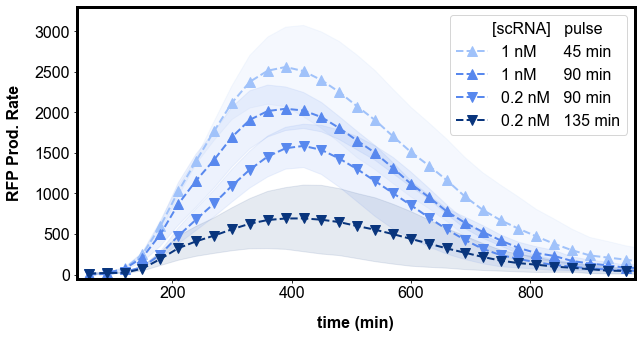

In [7]:
plt.figure(figsize = (10,5))
# myplot(RFPEx[exps['high_4']].diff(2), color = 'b')
# myplot(RFPEx[exps['high_3']].diff(2), color = 'k')
myplot(RFPEx[exps['high_1']].diff(2), color = '#a0c2fa', linestyle = '--',marker = '^', markersize = 10, label = '1 nM      45 min')
myplot(RFPEx[exps['high_2']].diff(2), color = '#5888ee', linestyle = '--',marker = '^',markersize = 10, label = '1 nM      90 min')

myplot(RFPEx[exps['med_2']].diff(2), color = '#5888ee', linestyle = '--',marker = 'v',markersize = 10, label = '0.2 nM   90 min')
myplot(RFPEx[exps['med_3']].diff(2), color = '#09357d', linestyle = '--', marker = 'v',markersize = 10, label = '0.2 nM   135 min')

plt.xlim([40,975])
plt.ylim([-50,3300])
plt.legend(title = '    [scRNA]   pulse')
plt.ylabel('RFP Prod. Rate', labelpad = ypad*1.1)
plt.xlabel('time (min)', labelpad = xpad)

#plt.savefig('pulse.svg')

In [9]:
pulses = [45,90,90,135]
concs = [1,1,0.2,0.2]
times = [RFPEx[exps[c]].diff(2).mean(1).argmax()*30 for c in ['high_1','high_2', 'med_2','med_3']]
peaks = [RFPEx[exps[c]].diff(2).mean(1).max() for c in ['high_1','high_2', 'med_2','med_3']]


In [10]:
peaks

[2559.3333333333335, 2044.3333333333333, 1586.6666666666667, 693.0]

In [11]:
times

[390, 390, 420, 420]